In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)
%matplotlib inline
import seaborn as sns
import sklearn
from datetime import datetime
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
print(sys.version)

3.6.8 |Anaconda custom (64-bit)| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


The Centers for Medicare & Medicaid Services (CMS) has prepared a public data set, the Provider Utilization and Payment Data Physician and Other Supplier Public Use File (herein referred to as “Physician and Other Supplier PUF”), with information on services and procedures provided to Medicare beneficiaries by physicians and other healthcare professionals. The Physician and Other Supplier PUF contains information on utilization, payment (allowed amount and Medicare payment), and submitted charges organized by National Provider Identifier (NPI), Healthcare Common Procedure Coding System (HCPCS) code, and place of service. This PUF is based on information from CMS administrative claims data for Medicare beneficiaries enrolled in the fee-for-service program available from the CMS Chronic Condition Data Warehouse (www.ccwdata.org). The data in the Physician and Other Supplier PUF covers calendar year 2016 and contains 100% final-action physician/supplier Part B non-institutional line items for the Medicare fee-for-service population.

<b> Dataset details </b> - 
Medicare Provider Utilization and Payment Data: Physician and Other Supplier PUF CY2016
https://data.cms.gov/Medicare-Physician-Supplier/Medicare-Provider-Utilization-and-Payment-Data-Phy/utc4-f9xp

In [3]:
# read CSV
medicare_pay_df = pd.read_csv('data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2016.csv'
                              ,low_memory=False)
medicare_pay_df.head()

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,57.0,55,57,72.743158,325.157895,54.474386,55.807193
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,38.0,38,38,135.010000,614.000000,105.850000,107.230000
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99220,Hospital observation care typically 70 minutes...,N,23.0,23,23,189.239565,769.347826,146.116522,144.278696
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,20.0,20,20,100.750000,460.000000,78.990000,80.280000
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,96.0,87,96,136.250000,625.000000,105.477604,107.007708


* Change the display size of rows and columns to view all the data

In [4]:
# To view all the 81 columns in the data frame, use the set_option to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
medicare_pay_df.head(10)

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,57.0,55,57,72.743158,325.157895,54.474386,55.807193
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38.0,38,38,135.010000,614.000000,105.850000,107.230000
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23.0,23,23,189.239565,769.347826,146.116522,144.278696
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20.0,20,20,100.750000,460.000000,78.990000,80.280000
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,96.0,87,96,136.250000,625.000000,105.477604,107.007708
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,148.0,141,148,203.793919,920.614865,159.083446,159.597162
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99225,"Subsequent observation care, typically 25 minu...",N,11.0,11,11,72.480000,328.000000,56.820000,57.540000
7,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99232,"Subsequent hospital inpatient care, typically ...",N,596.0,270,596,71.864362,326.486577,56.210990,56.855134
8,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99233,"Subsequent hospital inpatient care, typically ...",N,117.0,85,117,103.540000,470.000000,80.909316,81.989231
9,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99238,"Hospital discharge day management, 30 minutes ...",N,20.0,20,20,72.120000,328.000000,52.831500,53.561000


* Review the shape of the dataset

In [6]:
medicare_pay_df.shape

(9714896, 26)

In [7]:
medicare_pay_df.columns

Index(['National Provider Identifier', 'Last Name/Organization Name of the Provider', 'First Name of the Provider', 'Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'Street Address 1 of the Provider', 'Street Address 2 of the Provider', 'City of the Provider', 'Zip Code of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount'], dtype='object')

* Rename the existing columns, removing the spaces in the column names - Create a new dataframe with renamed columns

In [8]:
# rename the columns
medicare_new_pay_df=medicare_pay_df.rename(columns = {'National Provider Identifier':'npi',
                                  'Last Name/Organization Name of the Provider':'nppes_provider_last_org_name',
                                  'First Name of the Provider':'nppes_provider_first_name',
                                  'Middle Initial of the Provider':'nppes_provider_mi',
                                  'Credentials of the Provider':'nppes_credentials',
                                  'Gender of the Provider':'nppes_provider_gender',
                                  'Entity Type of the Provider':'nppes_entity_code',
                                  'Street Address 1 of the Provider':'nppes_provider_street1',
                                  'Street Address 2 of the Provider':'nppes_provider_street2',
                                  'City of the Provider':'nppes_provider_city',
                                  'Zip Code of the Provider':'nppes_provider_zip',
                                  'State Code of the Provider':'nppes_provider_state',
                                  'Country Code of the Provider':'nppes_provider_country',
                                  'Provider Type':'provider_type',
                                  'Medicare Participation Indicator':'medicare_participation_indicator',
                                  'Place of Service':'place_of_service',
                                  'HCPCS Code':'hcpcs_code',
                                  'HCPCS Description':'hcpcs_description',
                                  'HCPCS Drug Indicator':'hcpcs_drug_indicator',
                                  'Number of Services':'line_srvc_cnt',
                                  'Number of Medicare Beneficiaries':'bene_unique_cnt',
                                  'Number of Distinct Medicare Beneficiary/Per Day Services':'bene_day_srvc_cnt',
                                  'Average Medicare Allowed Amount':'average_Medicare_allowed_amt',
                                  'Average Submitted Charge Amount':'average_submitted_chrg_amt',
                                  'Average Medicare Payment Amount':'average_Medicare_payment_amt',
                                  'Average Medicare Standardized Amount':'average_Medicare_standardized_amt'
                                  })

<b> Calculated column Total_avg_Med_payment_amt = average_Medicare_payment_amt * line_srvc_cnt </b>

In [9]:
medicare_new_pay_df['Total_avg_Med_payment_amt'] = medicare_new_pay_df['average_Medicare_payment_amt']*medicare_new_pay_df['line_srvc_cnt']



In [10]:
medicare_new_pay_df.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,57.0,55,57,72.743158,325.157895,54.474386,55.807193,3105.04
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38.0,38,38,135.010000,614.000000,105.850000,107.230000,4022.30
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23.0,23,23,189.239565,769.347826,146.116522,144.278696,3360.68
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,20.0,20,20,100.750000,460.000000,78.990000,80.280000,1579.80
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,96.0,87,96,136.250000,625.000000,105.477604,107.007708,10125.85


In [11]:
medicare_new_pay_df.dtypes

npi                                    int64
nppes_provider_last_org_name          object
nppes_provider_first_name             object
nppes_provider_mi                     object
nppes_credentials                     object
nppes_provider_gender                 object
nppes_entity_code                     object
nppes_provider_street1                object
nppes_provider_street2                object
nppes_provider_city                   object
nppes_provider_zip                    object
nppes_provider_state                  object
nppes_provider_country                object
provider_type                         object
medicare_participation_indicator      object
place_of_service                      object
hcpcs_code                            object
hcpcs_description                     object
hcpcs_drug_indicator                  object
line_srvc_cnt                        float64
bene_unique_cnt                        int64
bene_day_srvc_cnt                      int64
average_Me

In [12]:
medicare_new_pay_df._get_numeric_data().head()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
0,1003000126,57.0,55,57,72.743158,325.157895,54.474386,55.807193,3105.04
1,1003000126,38.0,38,38,135.010000,614.000000,105.850000,107.230000,4022.30
2,1003000126,23.0,23,23,189.239565,769.347826,146.116522,144.278696,3360.68
3,1003000126,20.0,20,20,100.750000,460.000000,78.990000,80.280000,1579.80
4,1003000126,96.0,87,96,136.250000,625.000000,105.477604,107.007708,10125.85


In [13]:
medicare_new_pay_df.select_dtypes(object).head()

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator
0,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N
1,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N
2,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N
3,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N
4,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N


In [14]:
medicare_new_pay_df.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
count,9.714896e+06,9.714896e+06,9.714896e+06,9.714896e+06,9.714896e+06,9.714896e+06,9.714896e+06,9.714896e+06,9.714896e+06
mean,1.499817e+09,2.450532e+02,8.896190e+01,1.437049e+02,1.001832e+02,3.407426e+02,7.668334e+01,7.748752e+01,8.450609e+03
std,2.877122e+08,4.309644e+03,1.156491e+03,2.329901e+03,2.563474e+02,9.966428e+02,1.994658e+02,2.000273e+02,7.302027e+04
min,1.003000e+09,5.200000e+00,1.100000e+01,1.100000e+01,1.059603e-04,1.059603e-04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.255301e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.376626e+01,5.500000e+01,1.896650e+01,1.974597e+01,7.490175e+02
50%,1.497980e+09,4.400000e+01,3.300000e+01,4.100000e+01,6.409993e+01,1.417401e+02,4.599686e+01,4.718250e+01,2.109920e+03
75%,1.740640e+09,1.190000e+02,7.600000e+01,1.080000e+02,1.135600e+02,2.900000e+02,8.516210e+01,8.478000e+01,6.205403e+03
max,1.993000e+09,2.848099e+06,7.769920e+05,2.180422e+06,5.060338e+04,9.999999e+04,3.756922e+04,4.024316e+04,6.165556e+07


In [15]:
# check for nulls
medicare_new_pay_df.isna().sum()

npi                                        0
nppes_provider_last_org_name             136
nppes_provider_first_name             423651
nppes_provider_mi                    2760957
nppes_credentials                     668142
nppes_provider_gender                 423555
nppes_entity_code                          0
nppes_provider_street1                     0
nppes_provider_street2               5529780
nppes_provider_city                        0
nppes_provider_zip                         2
nppes_provider_state                       0
nppes_provider_country                     0
provider_type                              0
medicare_participation_indicator           0
place_of_service                           0
hcpcs_code                                 0
hcpcs_description                          0
hcpcs_drug_indicator                       0
line_srvc_cnt                              0
bene_unique_cnt                            0
bene_day_srvc_cnt                          0
average_Me

<b> Data cleaning on nulls </b>
* nppes_provider_last_org_name – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s last name. When the provider is registered as an organization (entity type code = ‘O’), this is the organization name.

* nppes_provider_first_name – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s first name. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

* nppes_provider_mi – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s middle initial. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

* nppes_provider_gender – When the provider is registered in NPPES as an individual (entity type code=’I’), 
this is the provider’s gender. 
When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

* nppes_credentials – When the provider is registered in NPPES as an individual (entity type code=’I’), these are the provider’s credentials. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

<b> Find out how many are Individuals and how many are Organizations </b>

In [16]:
medicare_new_pay_df[['nppes_entity_code','npi']].groupby(['nppes_entity_code']).count()



,npi
nppes_entity_code,
I,9291341
O,423555


<b> Find out how many services are provided in Facilities and how many are provided in non-facility (Offices) </b>

In [17]:
medicare_new_pay_df[['place_of_service','npi']].groupby(['place_of_service']).count()



,npi
place_of_service,
F,3742554
O,5972342


<b> Find out how many are participating in medicare and how many are not participating in medicare.  </b>

In [18]:
medicare_new_pay_df[['medicare_participation_indicator',
                     'npi']].groupby(['medicare_participation_indicator']).count()

                                                                        

,npi
medicare_participation_indicator,
N,3517
Y,9711379


<b> Find out how many maedicare providers are male and how many of them are female </b>

In [19]:
medicare_new_pay_df[['nppes_provider_gender', 'npi']].groupby(['nppes_provider_gender']).count()
                                                                        

,npi
nppes_provider_gender,
F,2730509
M,6560832


<b> how many services in US and outside US </b>

In [20]:
df_us=medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_country']=='US')]
df_non_us=medicare_new_pay_df[~(medicare_new_pay_df['nppes_provider_country']=='US')]


In [21]:
print ('Number of Services offered in US - ',df_us['npi'].count())
print ('Number of Services offered outside US - ',df_non_us['npi'].count())



Number of Services offered in US -  9714369
Number of Services offered outside US -  527


In [22]:
len(medicare_new_pay_df[~(medicare_new_pay_df['nppes_provider_country']=='US')])

527

<b>  remove rows where individuals'last name is null </b>

In [23]:
medicare_new_pay_df[medicare_new_pay_df['nppes_provider_last_org_name'].isnull()].groupby('nppes_entity_code').count()



,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,,
I,136,0,136,109,136,136,136,52,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136


<b> Since there are 136 records which are of entity_type as "Individual" and are missing the last_name, 
deleting these 136 rows from the  data frame.</b>


In [24]:
medicare_new_pay_df=medicare_new_pay_df[pd.notnull(medicare_new_pay_df['nppes_provider_last_org_name'])]

medicare_new_pay_df.shape

(9714760, 27)

* Check for the 'nppes_provider_last_org_name' after removing - No nulls to remain

In [25]:
medicare_new_pay_df[medicare_new_pay_df['nppes_provider_last_org_name'].isnull()].groupby('nppes_entity_code').count()



,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,,


In [26]:
medicare_new_pay_df[medicare_new_pay_df['nppes_provider_first_name'].isnull()].groupby('nppes_entity_code').count()



,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,,
I,96,96,0,22,96,96,96,30,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96
O,423555,423555,0,0,0,0,423555,95826,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555,423555


* nppes_provider_first_name – When the provider is registered in 'nppes' as an individual (entity type code=’I’), 
this is the provider’s first name. When the provider is registered as an organization (entity type code = ‘O’), 
this will be blank.

In [27]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_first_name'].isnull())
                    &(medicare_new_pay_df['nppes_entity_code']=='I')].groupby('nppes_entity_code').count()



,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,,
I,96,96,0,22,96,96,96,30,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96


<b> The above 96 rows of entity_type = "I" should be removed ; Individual types are expected to have first name </b>

In [28]:
medicare_new_pay_df=medicare_new_pay_df[~((medicare_new_pay_df['nppes_provider_first_name'].isnull())
                                          &(medicare_new_pay_df['nppes_entity_code']=='I'))]




* Review the shape of the dataset after deleting the above rows/columns

In [29]:
medicare_new_pay_df.shape

(9714664, 27)

In [30]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_mi'].isnull())
                    &(medicare_new_pay_df['nppes_entity_code']=='I')].groupby('nppes_entity_code').count()


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,,
I,2337301,2337301,2337301,0,2195530,2337301,2337301,994423,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301,2337301


In [31]:
medicare_new_pay_df.drop('nppes_provider_mi', axis=1, inplace=True)

<b> As there are 2337301 rows with no middle name, and all are Individual type, remove the middle name column all together as we can identify
using npi, first name and last name combination </b>

In [32]:
medicare_new_pay_df.shape

(9714664, 26)

In [33]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_credentials'].isnull())
                    &(medicare_new_pay_df['nppes_entity_code']=='I')].groupby('nppes_entity_code').count()


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,
I,244587,244587,244587,0,244587,244587,83512,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587,244587


* Remove the rows where credentials were not provided 

In [34]:
medicare_new_pay_df=medicare_new_pay_df[~((medicare_new_pay_df['nppes_credentials'].isnull())
                                          &(medicare_new_pay_df['nppes_entity_code']=='I'))]




* Review the shape of the dataframe after removing rows/columns above

In [35]:
medicare_new_pay_df.shape

(9470077, 26)

* check the count of rows where credentials are missing for Individual type -- should not be any

In [36]:
medicare_new_pay_df['nppes_credentials'].value_counts()

MD                      3298298
M.D.                    3240487
D.O.                     334056
DO                       246161
PA-C                     165934
DPM                      124956
O.D.                     100446
CRNA                      96294
M.D                       86439
NP                        77767
PA                        75802
PT                        71529
FNP                       57043
DPT                       50534
D.P.M.                    50386
OD                        49480
ARNP                      41472
APRN                      33223
D.C.                      29360
P.T.                      26228
P.A.                      25397
CRNP                      23315
M. D.                     21524
M.D., PH.D.               20039
FNP-C                     19627
NP-C                      19519
PAC                       17459
MD, PHD                   16620
DC                        14959
CNP                       14945
FNP-BC                    14835
N.P.    

In [37]:
# check the count of rows where credentials are missing for Individual type -- should not be any
medicare_new_pay_df[(medicare_new_pay_df['nppes_credentials'].isnull())
                    &(medicare_new_pay_df['nppes_entity_code']=='I')].groupby('nppes_entity_code').count()


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,


In [38]:
medicare_new_pay_df['nppes_provider_gender'].value_counts()

M    6427305
F    2619217
Name: nppes_provider_gender, dtype: int64

<b> If the entity is an Organization, then gender can be null; No action needed on those records </b>

In [39]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_gender'].notnull())
                    &(medicare_new_pay_df['nppes_entity_code']=='O')].groupby('nppes_entity_code').count()


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
nppes_entity_code,,,,,,,,,,,,,,,,,,,,,,,,,


In [40]:
medicare_new_pay_df[medicare_new_pay_df['nppes_provider_zip'].isnull()]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
1295172,1588870349,WIXSON,SANDRA,PH.D.,F,I,"ROTUNDA 8, CASA # 163",ULLOA,ULLOA,NaN,ZZ,CR,"Psychologist, Clinical",Y,O,90837,"Psychotherapy, 60 minutes with patient and/or ...",N,88.0,13,87,124.967955,148.295455,97.969091,100.490114,8621.28
9570674,1588870349,WIXSON,SANDRA,PH.D.,F,I,"ROTUNDA 8, CASA # 163",ULLOA,ULLOA,NaN,ZZ,CR,"Psychologist, Clinical",Y,O,90791,Psychiatric diagnostic evaluation,N,15.0,14,15,121.671333,150.000000,94.831333,96.586000,1422.47


* Remove the 2 records where Zip is null 

In [41]:
medicare_new_pay_df=medicare_new_pay_df[~((medicare_new_pay_df['nppes_provider_zip'].isnull()))]
                                          
medicare_new_pay_df.shape



(9470075, 26)

* Consider only the values where medicare_participation_indicator = Y; Remove all the rows where medicare_participation_indicator has a N. Total of 3436 rows will be removed from medicare_new_pay_df.

In [42]:
medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator']=='N')]['npi'].count()

3436

In [43]:
medicare_new_pay_df=medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator']=='Y')]
                                          
medicare_new_pay_df.shape

(9466639, 26)

* Review the null values again, nulls in Street2 can be ignored

In [44]:
medicare_new_pay_df.isnull().sum()

npi                                        0
nppes_provider_last_org_name               0
nppes_provider_first_name             423527
nppes_credentials                     423527
nppes_provider_gender                 423527
nppes_entity_code                          0
nppes_provider_street1                     0
nppes_provider_street2               5366720
nppes_provider_city                        0
nppes_provider_zip                         0
nppes_provider_state                       0
nppes_provider_country                     0
provider_type                              0
medicare_participation_indicator           0
place_of_service                           0
hcpcs_code                                 0
hcpcs_description                          0
hcpcs_drug_indicator                       0
line_srvc_cnt                              0
bene_unique_cnt                            0
bene_day_srvc_cnt                          0
average_Medicare_allowed_amt               0
average_su

<b> Description of the number columns - purpose </b>

<b> line_srvc_cnt </b> – Number of services provided; note that the metrics used to count the number provided
can vary from service to service.

<b> bene_unique_cnt </b>  – Number of distinct Medicare beneficiaries receiving the service.

<b> bene_day_srvc_cnt </b> – Number of distinct Medicare beneficiary/per day services. Since a given
beneficiary may receive multiple services of the same type (e.g., single vs. multiple cardiac stents) on a
single day, this metric removes double-counting from the line service count to identify whether a unique
service occurred.

<b> average_Medicare_allowed_amt </b> – Average of the Medicare allowed amount for the service; this figure
is the sum of the amount Medicare pays, the deductible and coinsurance amounts that the beneficiary is
responsible for paying, and any amounts that a third party is responsible for paying.

<b> average_submitted_chrg_amt </b> – Average of the charges that the provider submitted for the service.

<b> average_Medicare_payment_amt </b> – Average amount that Medicare paid after deductible and
coinsurance amounts have been deducted for the line item service. Note: In general, Medicare FFS
claims with dates-of-service or dates-of-discharge on or after April 1, 2013, incurred a 2 percent
reduction in Medicare payment. This is in response to mandatory across-the-board reductions in Federal
spending, also known as sequestration. For additional information, 
visit http://www.cms.gov/Outreachand-Education/Outreach/FFSProvPartProg/Downloads/2013-03-08-standalone.pdf
    
<b> average_Medicare_standardized_amt </b> – Average amount that Medicare paid after beneficiary
deductible and coinsurance amounts have been deducted for the line item service and after
standardization of the Medicare payment has been applied. Standardization removes geographic
differences in payment rates for individual services, such as those that account for local wages or input
prices and makes Medicare payments across geographic areas comparable, so that differences reflect 
variation in factors such as physicians’ practice patterns and beneficiaries’ ability and willingness to
obtain care. Note: This variable is available starting with the calendar year 2014 data. Please refer to the
“Additional Information” section of this document for more details on the standardization of Medicare
payments. 

In [45]:
medicare_new_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9466639 entries, 0 to 9714895
Data columns (total 26 columns):
npi                                  int64
nppes_provider_last_org_name         object
nppes_provider_first_name            object
nppes_credentials                    object
nppes_provider_gender                object
nppes_entity_code                    object
nppes_provider_street1               object
nppes_provider_street2               object
nppes_provider_city                  object
nppes_provider_zip                   object
nppes_provider_state                 object
nppes_provider_country               object
provider_type                        object
medicare_participation_indicator     object
place_of_service                     object
hcpcs_code                           object
hcpcs_description                    object
hcpcs_drug_indicator                 object
line_srvc_cnt                        float64
bene_unique_cnt                      int64
bene_day

<b> How many transactions are with Medicare Participation Indicator as Y </b>

In [46]:
medicare_new_pay_df['medicare_participation_indicator'].value_counts()

Y    9466639
Name: medicare_participation_indicator, dtype: int64

<b> As dealing mostly with the Medicare data only, 
delete all the rows with Medicare Participation Indicator as N </b>

In [47]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')])['npi'].count()

258125

In [48]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['provider_type']=='Cardiovascular Disease (Cardiology)')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')])['npi'].count()

10510

In [49]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['provider_type']=='Family Practice')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')])['npi'].count()

33197

<b> Review the number of transactions by considering 
- State as VA
- Provider Type as 'Cardiovascular Disease (Cardiology)'
- Medicare Participation Indicator as Y
</b>

In [50]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['provider_type']=='Cardiovascular Disease (Cardiology)')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')]
)[['nppes_provider_city','nppes_provider_zip','npi']].groupby(by=['nppes_provider_city','nppes_provider_zip']).count()




npi
nppes_provider_city nppes_provider_zip     
ABINGDON            242100000            14
                    242113876             9
                    242117664            87
                    242117665            27
ALEXANDRIA          223041300            46
                    223041311            82
                    223041313            44
                    223063403           231
                    223063409            23
                    22314                 8
                    223155529             2
ANNANDALE           220031229            21
                    220031275            18
                    220031294            36
                    220032602            31
                    220032635            19
                    220036890            12
                    220037316            24
ARLINGTON           222015718           110
                    22203                 3
                    222041064            29
                    222041088            20
                    222044547            25
                    22205                65
                    222053609            28
                    222053683            41
BLUEFIELD           24605                12
                    246052000            40
                    246052026            45
CHARLOTTESVILLE     22903                37
                    229032981            21
                    229036905            14
                    229039353            55
                    229080001           305
                    229113554            33
                    229118844           175
CHESAPEAKE          233200302            44
                    233204985            34
                    233205041           226
CHESTER             23836                21
                    238362613            11
CHRISTIANSBURG      24073                12
                    240731515            34
                    240736345            25
COLONIAL HEIGHTS    238341447            16
                    238342970            27
                    238343610            30
CULPEPER            227013791            38
                    227013917            64
DANVILLE            24541                31
                    245411800            30
                    245412927            37
                    245414100           110
                    245414155            14
EMPORIA             238471232            27
                    238471240             8
FAIRFAX             22031                41
                    220312207            32
                    220312220            37
                    220312222            27
                    220312238            80
                    220314600            14
                    220314621            49
                    220315204            15
                    220315216            24
                    220331759           119
                    220332548            14
                    220333310             4
                    220334512             1
FALLS CHURCH        220421205             7
                    220421260           220
                    220421262           140
                    220422336            10
                    220423307             8
FARMVILLE           239011131            46
FISHERSVILLE        229392273            41
                    229392332            95
FORT BELVOIR        220605285             2
FRANKLIN            238511251            20
FREDERICKSBRG       224014490            29
FREDERICKSBURG      224014453            16
                    224014490           220
                    224087760           152
FREDRICKSBURG       224088709            32
GALAX               243332605            21
HAMPTON             236662402            14
                    236665906            33
                    236666601            20
HARRISONBURG        228013248            19
                    228013487       

<b> Review the number of transactions by considering 
- State as VA
- All the provider types by City and Zip
- Medicare Participation Indicator as Y
</b>

In [51]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
#                     &(medicare_new_pay_df['provider_type']=='Cardiovascular Disease (Cardiology)')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')])[['nppes_provider_city',
                                                                                        'nppes_provider_zip',
                                                                                        'provider_type',
                                                                                        'npi']].groupby(by=['nppes_provider_city',
                                                                                                            'nppes_provider_zip',
                                                                                                            'provider_type']).count()




npi
nppes_provider_city nppes_provider_zip provider_type                                      
ABINGDON            24210              Certified Registered Nurse Anesthetist (CRNA)     5
                                       Chiropractic                                      4
                                       Diagnostic Radiology                            253
                                       Emergency Medicine                               18
                                       Internal Medicine                                57
                                       Ophthalmology                                    17
                                       Optometry                                         4
                                       Orthopedic Surgery                               27
                    242100000          Cardiovascular Disease (Cardiology)              14
                    242102013          Licensed Clinical Social Worker                   1
                    242102339          Licensed Clinical Social Worker                   1
                    242102423          Mass Immunizer Roster Biller                      5
                    242102476          Chiropractic                                      2
                    242102483          Licensed Clinical Social Worker                   1
                    242102510          Centralized Flu                                   7
                    242102511          Optometry                                        13
                    242102576          Mass Immunizer Roster Biller                      5
                    242102589          Licensed Clinical Social Worker                   5
                                       Nurse Practitioner                                5
                                       Psychiatry                                        1
                    242102630          Chiropractic                                      2
                    242102715          Internal Medicine                                21
                                       Nurse Practitioner                               17
                                       Obstetrics & Gynecology                          12
                    242102758          Chiropractic                                      2
                    242102836          Otolaryngology                                   42
                    242102859          Otolaryngology                                   22
                    242102905          Licensed Clinical Social Worker                   1
                    242102912          Internal Medicine                                20
                    242102913          Obstetrics & Gynecology                          19
                    242102921          Anesthesiology                                    9
                                       Certified Registered Nurse Anesthetist (CRNA)    16
                                       Emergency Medicine                               13
                                       Nurse Practitioner                                6
                                       Pulmonary Disease                                24
                    242103208          Ophthalmology                                    15
                                       Optometry                                        22
                    242103220          Mass Immunizer Roster Biller                      7
                    242103248          Centralized Flu                                   3
                                       Mass Immunizer Roster Biller                      4
                    242103300          Psychiatry                                        2
                    242103305          Physician Assistant                              10
                    242103311          Ambulance Service Provider                  

<b> Review the number of transactions by considering 
- State as VA
- Specific Zip code as '22046' (equating the first 5 characters )
- Various provider types within the Zip code
- Medicare Participation Indicator as Y
</b>

In [52]:
# where zipcode is 22046
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
#                     &(medicare_new_pay_df['provider_type']=='Cardiovascular Disease (Cardiology)')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['nppes_provider_zip'].str[:5] =='22046')])[['nppes_provider_city',
                                                                                      'nppes_provider_zip',
                                                                                      'provider_type',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'nppes_provider_zip',
                                                                                                  'provider_type']).count()




npi
nppes_provider_city nppes_provider_zip provider_type                              
FALLS CHURCH        22046              Endocrinology                            17
                                       Family Practice                           9
                                       Internal Medicine                         4
                                       Nurse Practitioner                        1
                                       Optometry                                 4
                                       Physical Therapist in Private Practice    5
                    220462114          Mass Immunizer Roster Biller              3
                    220462116          Centralized Flu                           5
                    220463107          Dermatology                               6
                    220463108          Chiropractic                              2
                                       Psychiatry                                2
                    220463130          Physical Therapist in Private Practice   25
                    220463204          Physical Medicine and Rehabilitation     13
                                       Physical Therapist in Private Practice    3
                    220463248          Internal Medicine                        20
                    220463305          Ophthalmology                            10
                    220463327          Licensed Clinical Social Worker           1
                                       Ophthalmology                             5
                    220463335          Mass Immunizer Roster Biller              3
                    220463337          Physical Therapist in Private Practice    3
                    220463344          Optometry                                 1
                    220463430          Family Practice                          29
                    220463438          Chiropractic                              1
                    220463567          Physical Therapist in Private Practice    4
                    220463568          Physical Therapist in Private Practice    3
                    220464201          Mass Immunizer Roster Biller              4
                                       Nurse Practitioner                        2
                    220464205          Allergy/ Immunology                       5
                                       Family Practice                          15
                                       Internal Medicine                        38
                                       Physician Assistant                       6
                                       Pulmonary Disease                        22
                                       Sports Medicine                          22
                    220464226          Podiatry                                 12
                    220464229          Physical Therapist in Private Practice    2
                    220464235          Endocrinology                             3
                                       Family Practice                           5
                    220464241          Family Practice                          10
                    220464501          Family Practice                           9
                                       Podiatry                                 13
                    220464516          Optometry                                 1
                    220464518          Anesthesiology                            3
                                       Dermatology                               1
                                       Diagnostic Radiology                      8
                                       Emergency Medicine                        2
                                       Family Practice                           4
                                       Internal Medicine                         4
            

<b> What's happening around your area ? What kind of medicare provider types and how many services?
Analysis on State = VA, City as "Falls Church"</b>

In [53]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
#                     &(medicare_new_pay_df['provider_type']=='Cardiovascular Disease (Cardiology)')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['nppes_provider_zip'].str[:5] =='22046')])[['nppes_provider_city',
                                                                                      'provider_type',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'provider_type']).count()




npi
nppes_provider_city provider_type                              
FALLS CHURCH        Allergy/ Immunology                       5
                    Anesthesiology                            3
                    Centralized Flu                           5
                    Chiropractic                              3
                    Dermatology                               7
                    Diagnostic Radiology                      8
                    Emergency Medicine                        2
                    Endocrinology                            20
                    Family Practice                          92
                    Internal Medicine                        72
                    Licensed Clinical Social Worker           2
                    Mass Immunizer Roster Biller             14
                    Nurse Practitioner                        6
                    Ophthalmology                            19
                    Optometry                                 6
                    Physical Medicine and Rehabilitation     13
                    Physical Therapist in Private Practice   45
                    Physician Assistant                       6
                    Podiatry                                 25
                    Psychiatry                                2
                    Pulmonary Disease                        22
                    Sports Medicine                          22

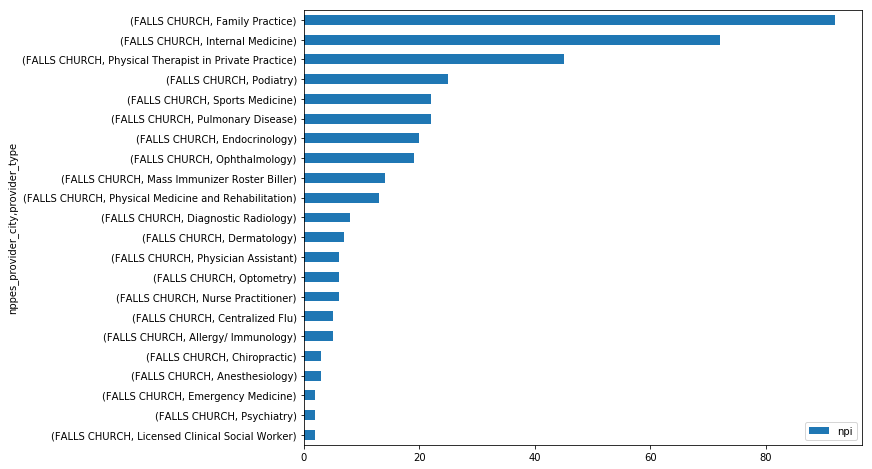

In [54]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['nppes_provider_zip'].str[:5] =='22046')])[['nppes_provider_city',
                                                                                      'provider_type',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'provider_type']).count().sort_values(by='npi', ascending=True).plot(kind='barh', figsize=(10,8))




<b> Whats happening around your area ? What kind of medicare types and how many transactions?
Anaysis on State = VA, City as "Falls Church"
list of specific services with in the Family Practice </b>

In [55]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['nppes_provider_zip'].str[:5] =='22046')
                    &(medicare_new_pay_df['provider_type']=='Family Practice')])[['nppes_provider_city',
                                                                                      'hcpcs_description',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'hcpcs_description']).count().sort_values(by=['npi'])




npi
nppes_provider_city hcpcs_description                                      
FALLS CHURCH        Influenza virus vaccine, split virus, when admi...    1
                    Transitional care management services, highly c...    1
                    Annual wellness visit; includes a personalized ...    1
                    Automated urinalysis test                             1
                    Established patient home visit, typically 25 mi...    1
                    Subsequent nursing facility visit, typically 25...    1
                    Influenza virus vaccine, split virus, when admi...    1
                    Blood test, clotting time                             2
                    Established patient office or other outpatient ...    2
                    New patient office or other outpatient visit, t...    2
                    Established patient office or other outpatient,...    2
                    Influenza virus vaccine, split virus, when admi...    2
                    Urinalysis, manual test                               3
                    New patient office or other outpatient visit, t...    4
                    Vaccine for pneumococcal polysaccharide for inj...    4
                    Annual wellness visit, includes a personalized ...    4
                    Insertion of needle into vein for collection of...    4
                    Vaccine for influenza for injection into muscle       6
                    Pneumococcal vaccine for injection into muscle        6
                    Routine EKG using at least 12 leads including i...    6
                    Administration of pneumococcal vaccine                7
                    Administration of influenza virus vaccine             9
                    Established patient office or other outpatient,...   11
                    Established patient office or other outpatient ...   11

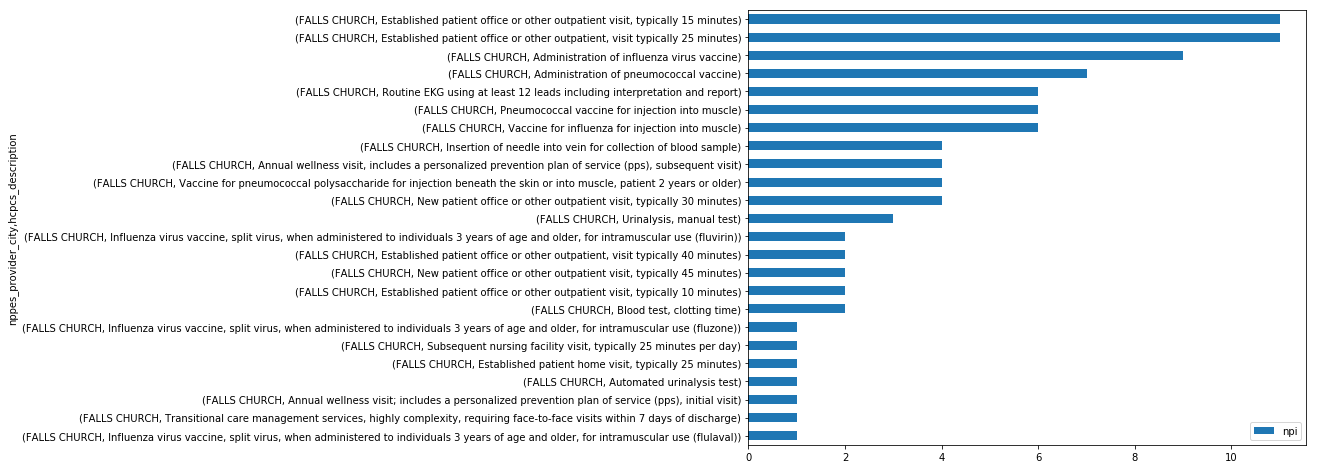

In [56]:
(medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_state']=='VA')
                    &(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['nppes_provider_zip'].str[:5] =='22046')
                    &(medicare_new_pay_df['provider_type']=='Family Practice')])[['nppes_provider_city',
                                                                                      'hcpcs_description',
                                                                                      'npi']
                                                                                    ].groupby(by=['nppes_provider_city',
                                                                                                  'hcpcs_description']).count().sort_values(by='npi', ascending=True).plot(kind='barh', figsize=(10,8))




<b>
As you can see, visits that are usually fall under the "Established patient office or other outpatient, visit typically 25 minutes"
or "Established patient office or other outpatient, visit typically 15 minutes" are the services that are in demand among the 
family practice providers.
</b>


<b> Number of transactions considering
- Most in demand provider type
- Medicare Participation Indicator as Y
</b>

In [57]:
# Format the numeric columns to hold 3 decimal values
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [58]:
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    ])[['provider_type',
                        'npi', 
                        'Total_avg_Med_payment_amt'
                       ]].groupby(by=['provider_type']).agg(
                                   {'Total_avg_Med_payment_amt': 'sum', 
                                    'npi': 'count'
                                   }).sort_values(by='npi',ascending=False)




,Total_avg_Med_payment_amt,npi
provider_type,,
Diagnostic Radiology,3322504463.470,1237600
Internal Medicine,8459954783.030,1136474
Family Practice,4537384407.440,957421
Nurse Practitioner,1965012587.340,450150
Cardiovascular Disease (Cardiology),4061791104.390,444644
Physician Assistant,1194168420.190,324352
Orthopedic Surgery,2141072367.950,301371
Ophthalmology,6304814811.511,238870
Anesthesiology,971344548.660,227015


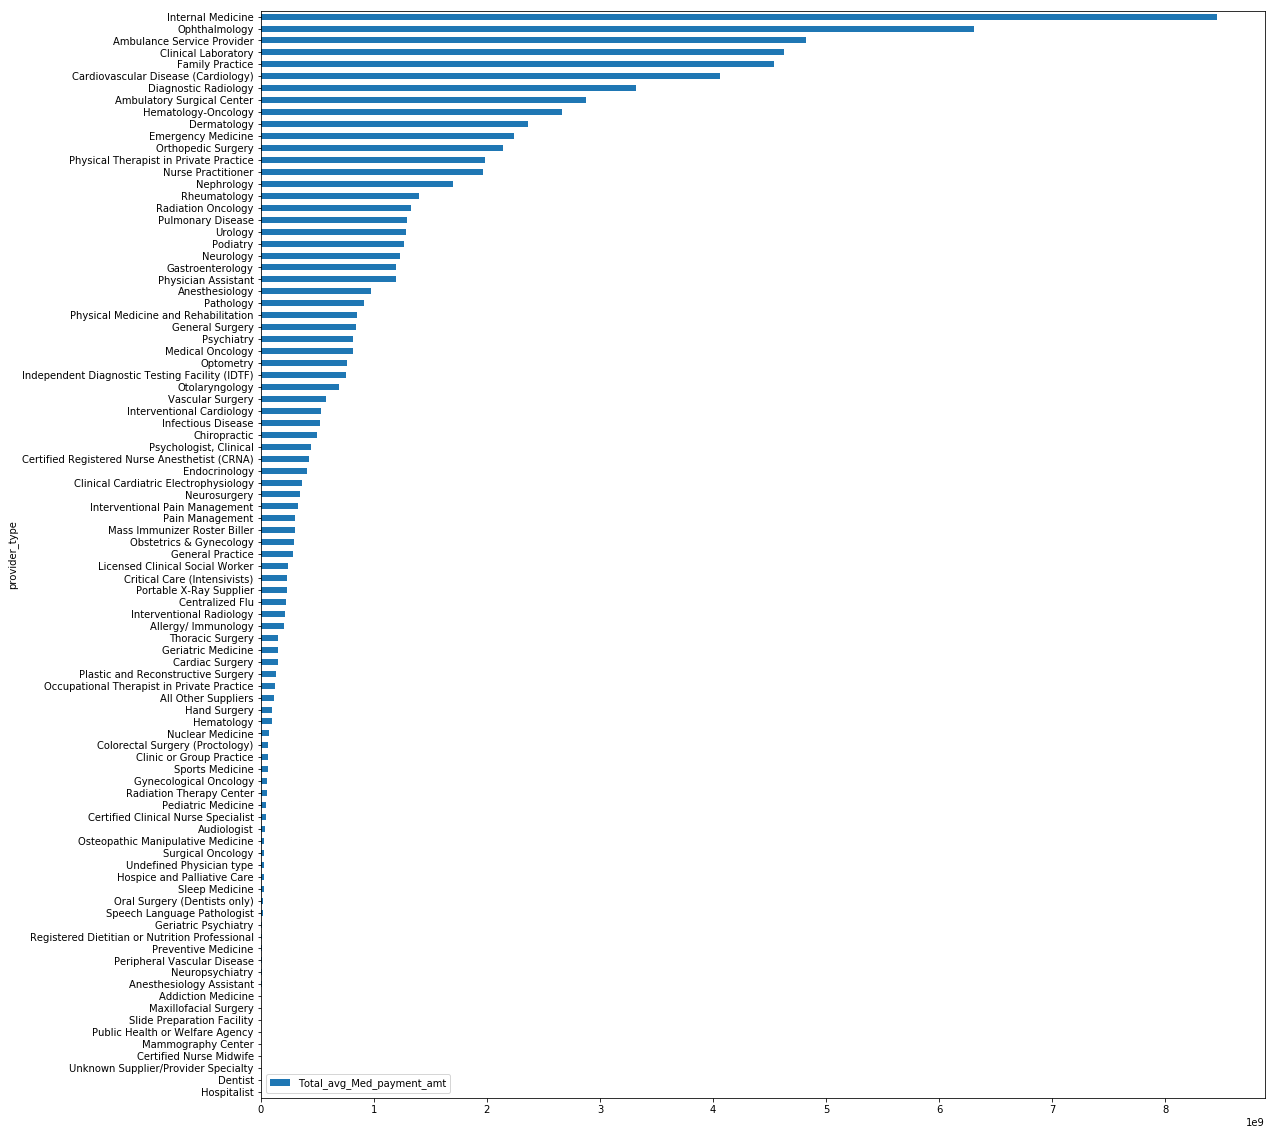

In [59]:
# Sort by Total Average Medicare Payment Amount
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    ])[['provider_type',
                        'Total_avg_Med_payment_amt'
                       ]].groupby(by=['provider_type']).agg(
                                   {'Total_avg_Med_payment_amt': 'sum'
                                   }).sort_values(
                                         by=['Total_avg_Med_payment_amt'],ascending=True).plot(
                                         kind='barh',figsize=(18,20))




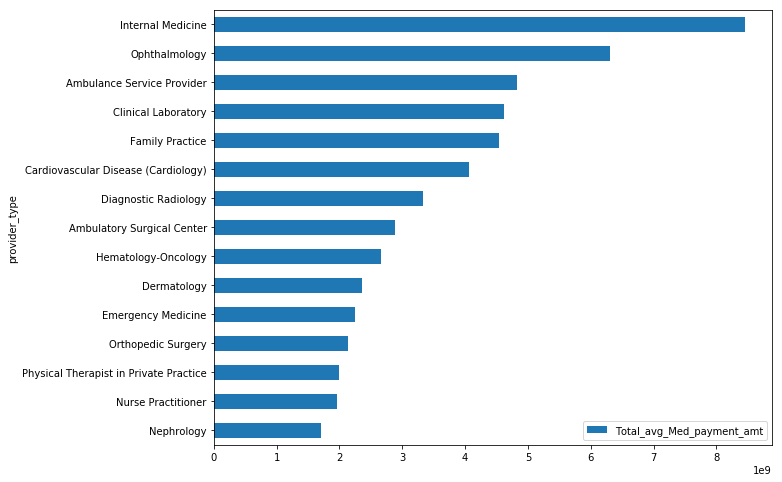

In [60]:
# Sort by Total Average Medicare Payment Amount - top 15
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    ])[['provider_type',
                        'Total_avg_Med_payment_amt'
                       ]].groupby(by=['provider_type']).agg(
                                   {'Total_avg_Med_payment_amt': 'sum'
                                   }).sort_values(
                                         by=['Total_avg_Med_payment_amt'],ascending=False).head(15).plot(
                                         kind='barh',figsize=(10,8)).invert_yaxis()


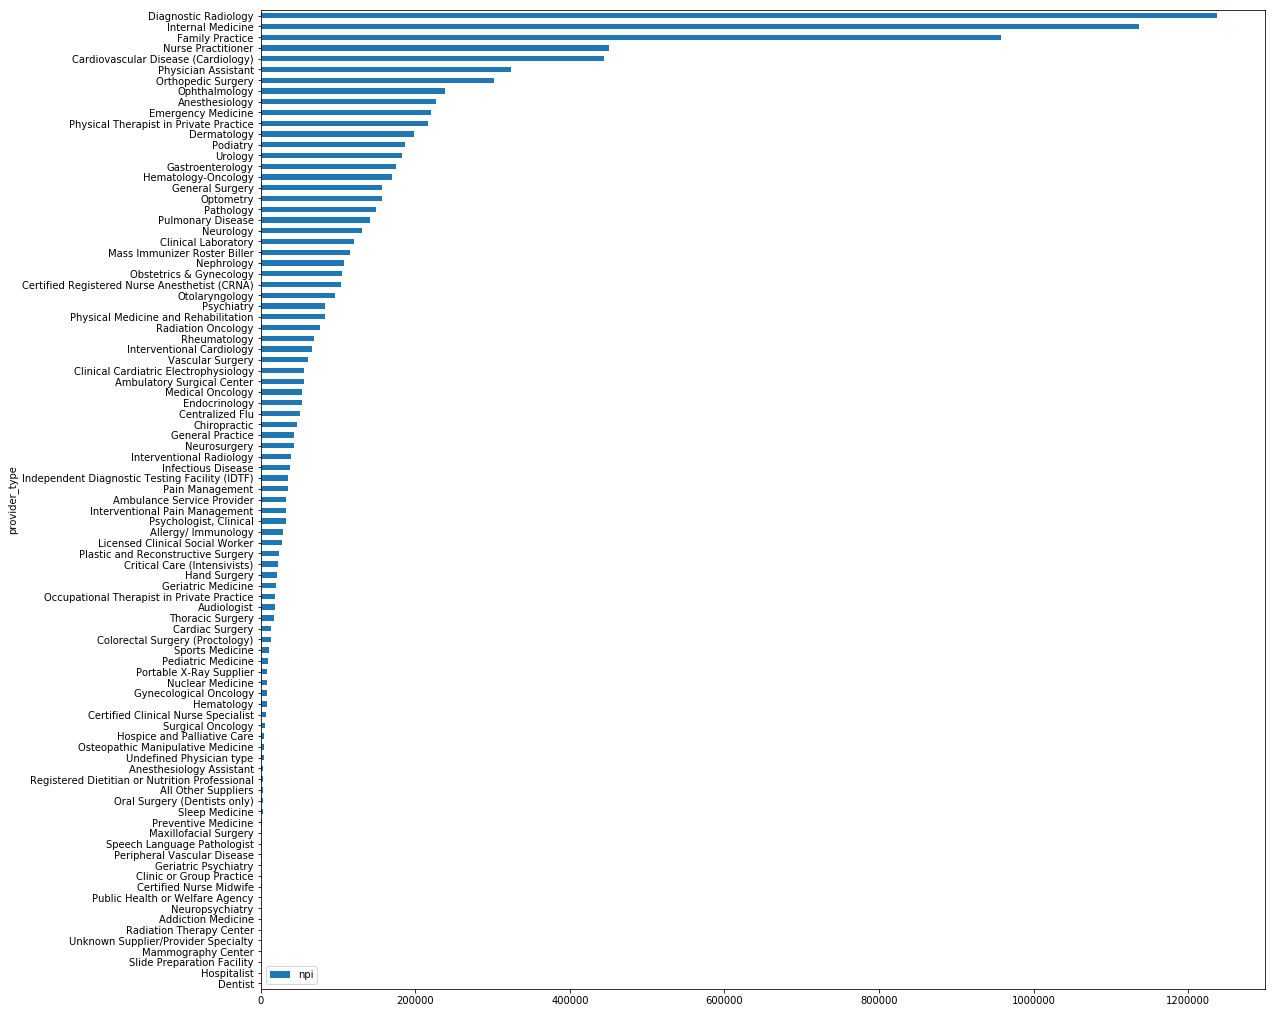

In [61]:
# Sort by Total count of services provided by provider type 
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    ])[['provider_type',
                        'npi', 
                        'Total_avg_Med_payment_amt'
                       ]].groupby(by=['provider_type']).agg(
                                   { 
                                    'npi': 'count'
                                   }).sort_values(
                                            by='npi',ascending=True).plot(
                                            kind='barh',figsize=(18,18))




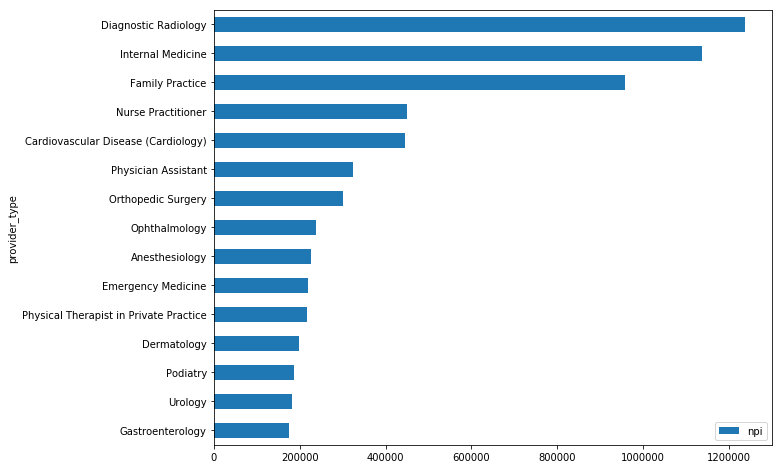

In [62]:
# Sort by Total count of services provided by provider type 
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    ])[['provider_type',
                        'npi', 
                        'Total_avg_Med_payment_amt'
                       ]].groupby(by=['provider_type']).agg(
                                   { 
                                    'npi': 'count'
                                   }).sort_values(
                                            by='npi',ascending=False).head(15).plot(
                                         kind='barh',figsize=(10,8)).invert_yaxis()




In [63]:
# Number of services offered within the provider type 'Diagnostic Radiology')
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['provider_type'] =='Diagnostic Radiology')
                    ])[['hcpcs_code','hcpcs_description','npi']].groupby(
    by=['hcpcs_code','hcpcs_description']).count().sort_values(by=['npi'],ascending=False)


#  1220 distinct services were provided within the Diagnostic Radiology


,,npi
hcpcs_code,hcpcs_description,
71020,"X-ray of chest, 2 views, front and side",33691
74177,CT scan of abdomen and pelvis with contrast,25279
71250,CT scan chest,23979
74176,CT scan of abdomen and pelvis,23725
73502,"X-ray of hip with pelvis, 2-3 views",23515
70450,CT scan head or brain,23033
71010,"X-ray of chest, 1 view, front",23011
73030,"X-ray of shoulder, minimum of 2 views",22917
74000,"X-ray of abdomen, single view",22855


In [64]:
(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    ])[['hcpcs_code',
                        'hcpcs_description',
                        'npi']].groupby(
    by=['hcpcs_code',
        'hcpcs_description']).count().sort_values(by=['npi'],ascending=False).head(10)




,,npi
hcpcs_code,hcpcs_description,
99213,"Established patient office or other outpatient visit, typically 15 minutes",437770
99214,"Established patient office or other outpatient, visit typically 25 minutes",401480
99204,"New patient office or other outpatient visit, typically 45 minutes",172098
99203,"New patient office or other outpatient visit, typically 30 minutes",170744
99232,"Subsequent hospital inpatient care, typically 25 minutes per day",168002
G0008,Administration of influenza virus vaccine,143276
99212,"Established patient office or other outpatient visit, typically 10 minutes",137144
99223,"Initial hospital inpatient care, typically 70 minutes per day",128119
99215,"Established patient office or other outpatient, visit typically 40 minutes",113453


In [65]:

(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['provider_type'] =='Cardiovascular Disease (Cardiology)')
                    ])[['hcpcs_code','hcpcs_description','npi']].groupby(
    by=['hcpcs_code','hcpcs_description']).count().sort_values(by=['npi'],ascending=False).head(10)





,,npi
hcpcs_code,hcpcs_description,
93306,"Ultrasound examination of heart including color-depicted blood flow rate, direction, and valve function",26090
99214,"Established patient office or other outpatient, visit typically 25 minutes",21953
99213,"Established patient office or other outpatient visit, typically 15 minutes",16636
93010,Routine electrocardiogram (EKG) using at least 12 leads with interpretation and report,14898
93000,Routine EKG using at least 12 leads including interpretation and report,14656
99232,"Subsequent hospital inpatient care, typically 25 minutes per day",14372
99204,"New patient office or other outpatient visit, typically 45 minutes",14242
78452,Nuclear medicine study of vessels of heart using drugs or exercise multiple studies,12856
93018,"Exercise or drug-induced heart and blood vessel stress test with EKG monitoring, physician interpretation and report",12020


In [66]:

(medicare_new_pay_df[(medicare_new_pay_df['medicare_participation_indicator'] =='Y')
                    &(medicare_new_pay_df['provider_type'] =='Cardiovascular Disease (Cardiology)')
                    ])[['nppes_provider_state','hcpcs_code','hcpcs_description','npi']].groupby(
    by=['nppes_provider_state','hcpcs_code','hcpcs_description']).count().sort_values(
    by=['hcpcs_description'],ascending=True).head(10)





,,,npi
nppes_provider_state,hcpcs_code,hcpcs_description,
ME,76376,3D radiographic procedure,8
NV,76376,3D radiographic procedure,1
WA,76376,3D radiographic procedure,14
VA,76376,3D radiographic procedure,2
OH,76376,3D radiographic procedure,20
RI,76376,3D radiographic procedure,2
LA,76376,3D radiographic procedure,1
CA,76376,3D radiographic procedure,26
UT,76376,3D radiographic procedure,6


* Medicare services provided outside US - list by provider type and country

In [67]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_country']!='US')
                   ][['provider_type','nppes_provider_country','npi']].groupby(by = ['provider_type','nppes_provider_country']).count()



npi
provider_type                                 nppes_provider_country     
Anesthesiology                                GB                        4
                                              JP                       22
Certified Registered Nurse Anesthetist (CRNA) DE                        7
                                              JP                        2
                                              TR                        1
Dermatology                                   IT                        6
Diagnostic Radiology                          JP                       69
                                              KR                        2
                                              TR                       33
Emergency Medicine                            DE                       10
                                              IT                        4
                                              JP                        3
                                              KR                        3
                                              KW                       11
                                              NL                        5
Family Practice                               DE                       30
                                              GB                        3
                                              IT                        2
                                              JP                        3
                                              KR                       11
                                              TH                       12
Gastroenterology                              GB                       12
                                              PK                       33
                                              SA                        1
General Surgery                               JP                        1
                                              VE                        2
Infectious Disease                            IN                        5
Internal Medicine                             AE                        3
                                              AR                        5
                                              CA                       16
                                              IL                        1
                                              TR                        8
Neurology                                     CA                       29
                                              IN                        2
Nurse Practitioner                            DE                        3
Optometry                                     CA                        2
                                              DE                        5
Otolaryngology                                GR                       19
                                              IL                        4
Pathology                                     AE                        3
                                              CA                       20
Physical Therapist in Private Practice        DE                        2
                                              TR                        3
Physician Assistant                           CA                       26
                                              DE                       16
                                              GB                        3
                                              KR                       18
Preventive Medicine                           DE                       10
Psychiatry                                    AG                        2
                                              CA                        7
                                              IL                        3
                                              PK                        3
                                              TR                        6


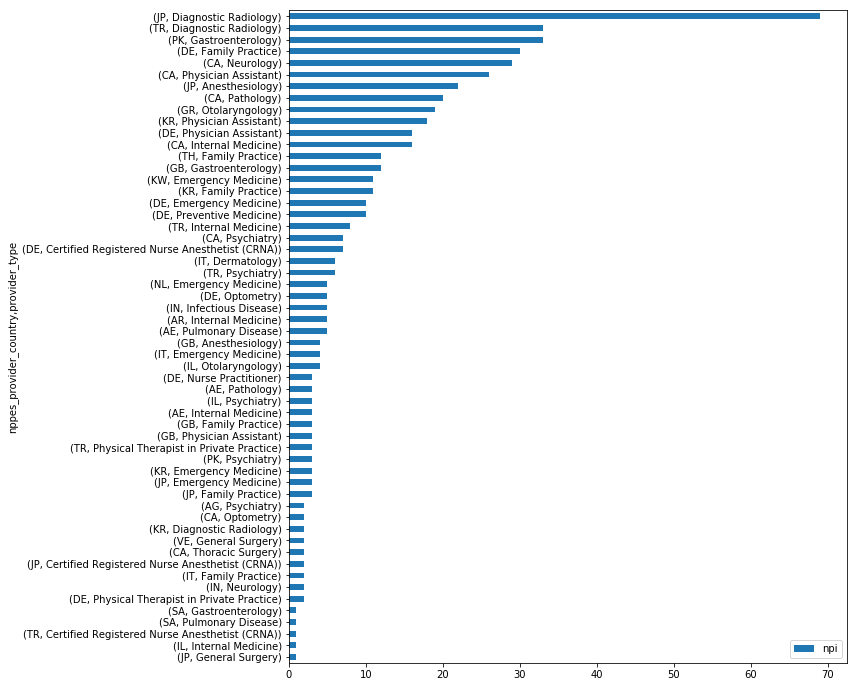

In [68]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_country']!='US')
                   ][['provider_type','nppes_provider_country','npi']].groupby(
                     by = ['nppes_provider_country', 'provider_type']).count().sort_values(by='npi').plot(kind='barh',
                                                                                    figsize=(10,12))
                                                                                   


In [69]:
medicare_new_pay_df[(medicare_new_pay_df['average_Medicare_payment_amt']==medicare_new_pay_df['average_Medicare_payment_amt'].max())]


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
3718780,1306804547,ACCREDO HEALTH GROUP INC,NaN,NaN,NaN,O,201 GREAT CIRCLE RD,NaN,NASHVILLE,372281701,TN,US,All Other Suppliers,Y,O,J7195,"Injection, factor ix (antihemophilic factor, r...",Y,102.000,26,84,50603.379,56749.611,37569.217,40243.156,3832060.180


* average_Medicare_allowed_amt – Average of the Medicare allowed amount for the service; this figure
is the sum of the amount Medicare pays

In [70]:
medicare_new_pay_df[['provider_type','average_Medicare_allowed_amt']].groupby(
    by=['provider_type','average_Medicare_allowed_amt']).count().sort_values(by=['average_Medicare_allowed_amt'],ascending=False).head(10)


Empty DataFrame
Columns: []
Index: [(All Other Suppliers, 50603.378627), (All Other Suppliers, 45412.439191000005), (All Other Suppliers, 41807.87582), (All Other Suppliers, 39715.456), (Ambulatory Surgical Center, 39279.28), (All Other Suppliers, 38952.803654), (Urology, 38070.9604), (Urology, 37984.798333), (Urology, 37910.1275), (Urology, 37901.861176)]

In [71]:
medicare_new_pay_df[(medicare_new_pay_df['provider_type']=='Ambulatory Surgical Center')
                  ][['provider_type',
                     'nppes_provider_state',
                     'nppes_provider_city',
                     'nppes_provider_zip',
                     'nppes_provider_country',
                     'average_Medicare_payment_amt', 
                     'line_srvc_cnt']].groupby(by = ['provider_type',
                                                     'nppes_provider_state',
                                                     'nppes_provider_city',
                                                     'nppes_provider_zip',
                                                     'nppes_provider_country']
                                                             ).agg({'average_Medicare_payment_amt': ['sum','count'], 
                                                                    'line_srvc_cnt': 'sum'}).head() 



average_Medicare_payment_amt       line_srvc_cnt
                                                                                                                                       sum count           sum
provider_type              nppes_provider_state nppes_provider_city nppes_provider_zip nppes_provider_country                                                 
Ambulatory Surgical Center AK                   ANCHORAGE           995013662          US                                         2679.486     4       413.000
                                                                    995015145          US                                         1948.870     3      1452.000
                                                                    995073448          US                                         1778.494     6       291.000
                                                                    99508              US                                         8043.879    10       233.000
                                                                    995082932          US                                         3239.966    10       935.000

In [72]:
medicare_new_pay_df[(medicare_new_pay_df['provider_type']=='Ambulatory Surgical Center')
                   &(medicare_new_pay_df['nppes_provider_state']=='VA')
                  ][['provider_type',
                     'nppes_provider_state',
                     'nppes_provider_city',
                     'nppes_provider_zip',
                     'nppes_provider_country',
                     'average_Medicare_payment_amt', 
                     'line_srvc_cnt']].groupby(by = ['provider_type',
                                                     'nppes_provider_state',
                                                     'nppes_provider_city',
                                                     'nppes_provider_zip',
                                                     'nppes_provider_country']
                                                             ).agg({'average_Medicare_payment_amt': ['sum','count'], 
                                                                    'line_srvc_cnt': 'sum'}).head() 



average_Medicare_payment_amt       line_srvc_cnt
                                                                                                                                       sum count           sum
provider_type              nppes_provider_state nppes_provider_city nppes_provider_zip nppes_provider_country                                                 
Ambulatory Surgical Center VA                   ALEXANDRIA          22306              US                                         1270.076     4       186.000
                                                                    223103245          US                                        13274.092    26      2264.000
                                                BLUEFIELD           24605              US                                          664.976     1       560.000
                                                CHARLOTTESVILLE     229018319          US                                        12939.245    26      2126.000
                                                                    229113553          US                                         2796.867    11       663.000

In [73]:
medicare_new_pay_df[(medicare_new_pay_df['provider_type']=='Ambulatory Surgical Center')
                   &(medicare_new_pay_df['nppes_provider_zip']=='705104645') ]

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
3189248,1427119452,PALMS SURGERY CENTER L.L.C.,NaN,NaN,NaN,O,204 N MAGDALEN SQ,NaN,ABBEVILLE,705104645,LA,US,Ambulatory Surgical Center,Y,F,65855,"Laser repair to improve eye fluid flow, 1 or m...",N,36.000,21,36,157.000,750.000,119.671,133.657,4308.150
5920584,1427119452,PALMS SURGERY CENTER L.L.C.,NaN,NaN,NaN,O,204 N MAGDALEN SQ,NaN,ABBEVILLE,705104645,LA,US,Ambulatory Surgical Center,Y,F,66821,Removal of recurring cataract in lens capsule ...,N,145.000,114,137,215.186,750.000,164.031,186.159,23784.540
6078206,1427119452,PALMS SURGERY CENTER L.L.C.,NaN,NaN,NaN,O,204 N MAGDALEN SQ,NaN,ABBEVILLE,705104645,LA,US,Ambulatory Surgical Center,Y,F,67228,Laser destruction of leaking retinal blood ves...,N,16.000,13,16,159.580,750.000,125.110,139.230,2001.760
7410621,1427119452,PALMS SURGERY CENTER L.L.C.,NaN,NaN,NaN,O,204 N MAGDALEN SQ,NaN,ABBEVILLE,705104645,LA,US,Ambulatory Surgical Center,Y,F,66982,Removal of cataract with insertion of lens,N,21.000,19,21,877.190,4000.000,687.710,765.310,14441.910
8081368,1427119452,PALMS SURGERY CENTER L.L.C.,NaN,NaN,NaN,O,204 N MAGDALEN SQ,NaN,ABBEVILLE,705104645,LA,US,Ambulatory Surgical Center,Y,F,67210,"Laser destruction of retinal growth, 1 or more...",N,32.000,24,32,221.290,750.000,173.490,193.070,5551.680
8686346,1427119452,PALMS SURGERY CENTER L.L.C.,NaN,NaN,NaN,O,204 N MAGDALEN SQ,NaN,ABBEVILLE,705104645,LA,US,Ambulatory Surgical Center,Y,F,66984,Removal of cataract with insertion of lens,N,570.000,371,570,874.882,3000.000,672.809,765.650,383501.240


In [74]:
medicare_new_pay_df[medicare_new_pay_df['provider_type']=='Dentist']

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
2661084,1689688772,ROSENTHAL,ALAN,DMD,M,I,120 EAST AVE,NaN,NORWALK,068515703,CT,US,Dentist,Y,O,99213,Established patient office or other outpatient...,N,13.000,13,13,79.190,450.000,58.066,53.526,754.860
5744111,1689688772,ROSENTHAL,ALAN,DMD,M,I,120 EAST AVE,NaN,NORWALK,068515703,CT,US,Dentist,Y,O,21210,Repair of nasal or cheek bone with bone graft,N,11.000,11,11,2618.690,3450.000,2053.050,1854.340,22583.550
7395159,1689688772,ROSENTHAL,ALAN,DMD,M,I,120 EAST AVE,NaN,NORWALK,068515703,CT,US,Dentist,Y,O,14040,Tissue transfer repair of wound (10 sq centime...,N,12.000,12,12,457.308,2950.000,358.529,329.183,4302.350
8966061,1689898801,HUGHES,EDWARD,D.D.S.,M,I,46440 BENEDICT DR,#201,STERLING,201646602,VA,US,Dentist,Y,O,70355,X-ray imaging of teeth,N,18.000,15,18,20.360,60.000,15.749,15.789,283.480


In [75]:
medicare_pay_df['National Provider Identifier'].unique()

array([1003000126, 1003000134, 1003000142, ..., 1124286869, 1477538346,
       1952630279])

In [76]:
medicare_pay_df.groupby('State Code of the Provider')['State Code of the Provider'].count()

State Code of the Provider
AA       129
AE       218
AK     16496
AL    185272
AP       182
AR    103927
AS         9
AZ    192986
CA    745923
CO    136780
CT    134659
DC     25487
DE     36284
FL    705580
GA    288182
GU      1311
HI     24363
IA    108822
ID     40942
IL    393270
IN    216959
KS    106462
KY    154483
LA    143991
MA    272283
MD    207530
ME     48540
MI    340002
MN    150319
MO    198833
MP       118
MS    103918
MT     30959
NC    355338
ND     25745
NE     75803
NH     50948
NJ    325222
NM     46341
NV     69518
NY    617875
OH    364195
OK    119581
OR    100493
PA    440698
PR     29546
RI     36509
SC    170236
SD     32579
TN    263328
TX    660946
UT     63281
VA    264986
VI      1645
VT     20163
WA    197551
WI    185682
WV     64074
WY     16776
XX        91
ZZ       527
Name: State Code of the Provider, dtype: int64

In [77]:
medicare_new_pay_df['provider_type'].value_counts()

Diagnostic Radiology                              1237600
Internal Medicine                                 1136474
Family Practice                                    957421
Nurse Practitioner                                 450150
Cardiovascular Disease (Cardiology)                444644
Physician Assistant                                324352
Orthopedic Surgery                                 301371
Ophthalmology                                      238870
Anesthesiology                                     227015
Emergency Medicine                                 219792
Physical Therapist in Private Practice             215994
Dermatology                                        198071
Podiatry                                           186168
Urology                                            183024
Gastroenterology                                   174462
Hematology-Oncology                                169890
General Surgery                                    157152
Optometry     

In [78]:
medicare_new_pay_df['nppes_entity_code'].value_counts()

I    9043112
O     423527
Name: nppes_entity_code, dtype: int64

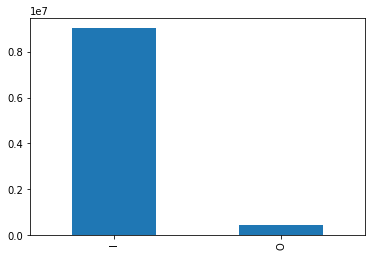

In [79]:
# plot number of Medicare providers as individuals and organizations
medicare_new_pay_df['nppes_entity_code'].value_counts().plot(kind='bar')

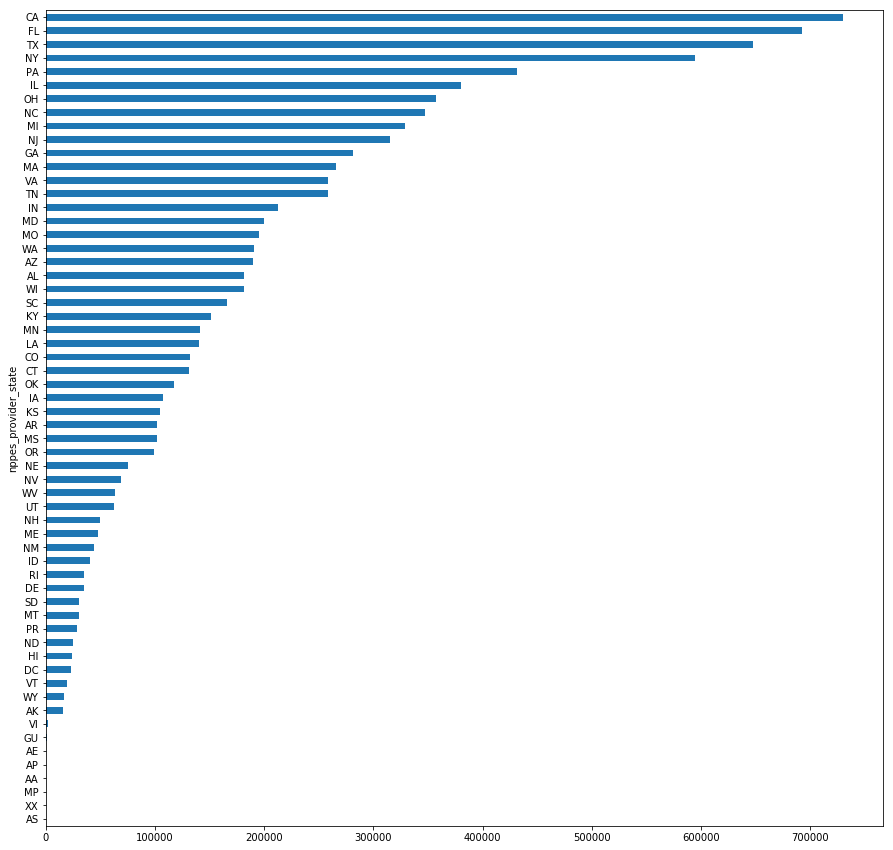

In [80]:
medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_country']=='US')].groupby(
                                                     by=['nppes_provider_state'])['npi'].count().sort_values(ascending=True).plot(kind='barh',
                                figsize=(15, 15),
                            )



In [81]:
medicare_new_pay_df.head(3)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
0,1003000126,ENKESHAFI,ARDALAN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,57.000,55,57,72.743,325.158,54.474,55.807,3105.040
1,1003000126,ENKESHAFI,ARDALAN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38.000,38,38,135.010,614.000,105.850,107.230,4022.300
2,1003000126,ENKESHAFI,ARDALAN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23.000,23,23,189.240,769.348,146.117,144.279,3360.680


In [82]:
medicare_new_pay_df['average_submitted_chrg_amt'].dtypes

dtype('float64')

In [83]:
# # # to convert column ['average_submitted_chrg_amt'] into INT
# medicare_new_pay_df.average_submitted_chrg_amt=medicare_new_pay_df.average_submitted_chrg_amt.astype(int)


In [84]:
# medicare_new_pay_df['average_submitted_chrg_amt'].dtypes

In [85]:
medicare_new_pay_df.average_submitted_chrg_amt.head(3)

0   325.158
1   614.000
2   769.348
Name: average_submitted_chrg_amt, dtype: float64

In [86]:
medicare_new_pay_df.corr()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
npi,1.000,0.001,0.001,0.001,-0.001,-0.000,-0.001,-0.001,0.000
line_srvc_cnt,0.001,1.000,0.500,0.589,-0.012,-0.012,-0.012,-0.012,0.273
bene_unique_cnt,0.001,0.500,1.000,0.869,-0.008,-0.008,-0.007,-0.008,0.381
bene_day_srvc_cnt,0.001,0.589,0.869,1.000,-0.008,-0.009,-0.008,-0.008,0.343
average_Medicare_allowed_amt,-0.001,-0.012,-0.008,-0.008,1.000,0.743,0.999,0.995,0.134
average_submitted_chrg_amt,-0.000,-0.012,-0.008,-0.009,0.743,1.000,0.743,0.739,0.090
average_Medicare_payment_amt,-0.001,-0.012,-0.007,-0.008,0.999,0.743,1.000,0.995,0.135
average_Medicare_standardized_amt,-0.001,-0.012,-0.008,-0.008,0.995,0.739,0.995,1.000,0.134
Total_avg_Med_payment_amt,0.000,0.273,0.381,0.343,0.134,0.090,0.135,0.134,1.000


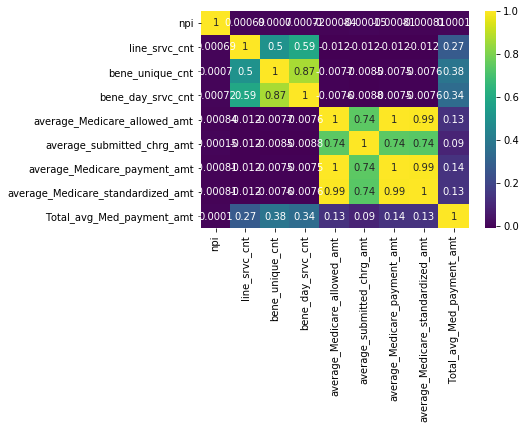

In [87]:
sns.heatmap(medicare_new_pay_df.corr(),annot=True, cmap='viridis')

In [88]:
medicare_new_pay_df.head(3)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
0,1003000126,ENKESHAFI,ARDALAN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99217,Hospital observation care discharge,N,57.000,55,57,72.743,325.158,54.474,55.807,3105.040
1,1003000126,ENKESHAFI,ARDALAN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99219,Hospital observation care typically 50 minutes,N,38.000,38,38,135.010,614.000,105.850,107.230,4022.300
2,1003000126,ENKESHAFI,ARDALAN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,MD,US,Internal Medicine,Y,F,99220,Hospital observation care typically 70 minutes...,N,23.000,23,23,189.240,769.348,146.117,144.279,3360.680


In [89]:
len(medicare_new_pay_df['hcpcs_description'])

9466639

In [90]:
print('Unique counts for nppes_provider_state - ',medicare_new_pay_df['nppes_provider_state'].nunique(),
      '; provider_type - ', medicare_new_pay_df['provider_type'].nunique(),
      '; hcpcs_description - ', medicare_new_pay_df['hcpcs_description'].nunique(), 
      '; line_srvc_cnt - ', medicare_new_pay_df['line_srvc_cnt'].nunique()  
     )

Unique counts for nppes_provider_state -  61 ; provider_type -  91 ; hcpcs_description -  5456 ; line_srvc_cnt -  30853


In [91]:
medicare_new_pay_df.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
count,9466639.000,9466639.000,9466639.000,9466639.000,9466639.000,9466639.000,9466639.000,9466639.000,9466639.000
mean,1499657439.313,247.087,89.648,144.342,100.573,341.718,76.992,77.817,8502.421
std,287737103.255,4362.786,1171.407,2359.864,258.715,1002.961,201.312,201.877,73875.199
min,1003000126.000,5.200,11.000,11.000,0.000,0.000,0.000,0.000,0.000
25%,1245635093.000,21.000,17.000,20.000,23.650,55.000,18.919,19.692,747.250
50%,1497964878.000,44.000,33.000,41.000,64.095,141.885,45.976,47.174,2110.140
75%,1740593094.000,119.000,77.000,108.000,113.731,290.000,85.310,84.835,6220.135
max,1992999825.000,2848099.000,776992.000,2180422.000,50603.379,99999.990,37569.217,40243.156,61655563.200


In [92]:
medicare_new_pay_df.dtypes

npi                                    int64
nppes_provider_last_org_name          object
nppes_provider_first_name             object
nppes_credentials                     object
nppes_provider_gender                 object
nppes_entity_code                     object
nppes_provider_street1                object
nppes_provider_street2                object
nppes_provider_city                   object
nppes_provider_zip                    object
nppes_provider_state                  object
nppes_provider_country                object
provider_type                         object
medicare_participation_indicator      object
place_of_service                      object
hcpcs_code                            object
hcpcs_description                     object
hcpcs_drug_indicator                  object
line_srvc_cnt                        float64
bene_unique_cnt                        int64
bene_day_srvc_cnt                      int64
average_Medicare_allowed_amt         float64
average_su

<b> Create a new dataframe to facilitate building linear regression model. </b>

In [93]:
medi_pay_temp_df_1=medicare_new_pay_df[(medicare_new_pay_df['nppes_provider_country']=='US')
                  ][['provider_type',
                     'nppes_entity_code',
                     'place_of_service',
                     'hcpcs_description',
                     'nppes_provider_state',
                     'average_submitted_chrg_amt',
                     'average_Medicare_allowed_amt',
                     'average_Medicare_payment_amt',
                     'line_srvc_cnt',
                     'bene_unique_cnt',
                     'bene_day_srvc_cnt'
                    ]].groupby(by = 
                                               ['provider_type',
                                                'nppes_entity_code',
                                                'place_of_service',
                                                'hcpcs_description',
                                                'nppes_provider_state']).agg(
                                                    {'average_submitted_chrg_amt':'sum',
                                                     'average_Medicare_allowed_amt':'sum',
                                                     'average_Medicare_payment_amt':'sum',
                                                     'line_srvc_cnt':'sum',
                                                     'bene_unique_cnt':'sum',
                                                     'bene_day_srvc_cnt':'sum'
                                                     }).reset_index()



In [94]:
medi_pay_temp_df_1.head(6).sort_values(by=['hcpcs_description'])

,provider_type,nppes_entity_code,place_of_service,hcpcs_description,nppes_provider_state,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt
0,Addiction Medicine,I,F,Critical care delivery critically ill or injur...,CA,848.000,229.720,180.100,26.000,26,26
1,Addiction Medicine,I,F,Critical care delivery critically ill or injur...,MA,581.436,216.550,169.780,44.000,32,44
2,Addiction Medicine,I,F,"Drug tests(s), presumptive, any number of drug...",WA,53.040,14.860,11.519,89.000,23,89
3,Addiction Medicine,I,F,"Emergency department visit, moderately severe ...",CA,230.000,63.350,49.670,75.000,70,75
4,Addiction Medicine,I,F,"Emergency department visit, moderately severe ...",OH,487.744,61.780,42.075,86.000,79,86
5,Addiction Medicine,I,F,"Emergency department visit, problem of high se...",CA,436.000,120.100,90.995,119.000,109,119


In [95]:
medi_pay_temp_df_1['hcpcs_description'][245827]

'Influenza virus vaccine, split virus, when administered to individuals 3 years of age and older, for intramuscular use (afluria)'

In [96]:
medicare_new_pay_df[(medicare_new_pay_df['provider_type']=='Medical Oncology')
                   &(medicare_new_pay_df['nppes_provider_state']=='AL') 
                   &(medicare_new_pay_df['hcpcs_description']=='Creatinine clearance measurement to test for kidney function')]


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standardized_amt,Total_avg_Med_payment_amt
5517598,1891756805,HAGLER,KARL,M.D.,M,I,101 DR W H BLAKE JR DR,NaN,MUSCLE SHOALS,356612152,AL,US,Medical Oncology,Y,O,82575,Creatinine clearance measurement to test for k...,N,15.000,15,15,12.880,35.000,12.620,12.620,189.300


In [97]:
medi_pay_temp_df_1.shape

(517853, 11)

In [98]:
medi_pay_temp_df_1.columns

Index(['provider_type', 'nppes_entity_code', 'place_of_service', 'hcpcs_description', 'nppes_provider_state', 'average_submitted_chrg_amt', 'average_Medicare_allowed_amt', 'average_Medicare_payment_amt', 'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt'], dtype='object')

In [99]:
medi_pay_temp_df_1.dtypes

provider_type                    object
nppes_entity_code                object
place_of_service                 object
hcpcs_description                object
nppes_provider_state             object
average_submitted_chrg_amt      float64
average_Medicare_allowed_amt    float64
average_Medicare_payment_amt    float64
line_srvc_cnt                   float64
bene_unique_cnt                   int64
bene_day_srvc_cnt                 int64
dtype: object

In [100]:
new_cols = ['average_submitted_chrg_amt',
            'average_Medicare_payment_amt',
                     'line_srvc_cnt',
                     'bene_unique_cnt',
                     'bene_day_srvc_cnt']
            
dummied_cols = ['provider_type',
                'nppes_entity_code',
                'hcpcs_description',
                'place_of_service',
                'nppes_provider_state'
                ]


# # Create a new data frame medi_pay_temp_df, by concatenating new_cols and dummied_cols
medi_pay_temp_df = pd.concat([medi_pay_temp_df_1[new_cols],medi_pay_temp_df_1[dummied_cols].astype(str)],axis=1)

# Create a new dataframe medi_pay_dummies_df - by doing the pd.get_dummies function on the dummied_cols.
# medi_pay_dummies_df = pd.get_dummies(medi_pay_temp_df_1, columns = dummied_cols)
medi_pay_dummies_df = pd.get_dummies(medi_pay_temp_df, columns = dummied_cols)
# Display first 5 rows from the new dataframe medi_pay_dummies_df
medi_pay_dummies_df.head()

,average_submitted_chrg_amt,average_Medicare_payment_amt,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,provider_type_Addiction Medicine,provider_type_All Other Suppliers,provider_type_Allergy/ Immunology,provider_type_Ambulance Service Provider,provider_type_Ambulatory Surgical Center,provider_type_Anesthesiology,provider_type_Anesthesiology Assistant,provider_type_Audiologist,provider_type_Cardiac Surgery,provider_type_Cardiovascular Disease (Cardiology),provider_type_Centralized Flu,provider_type_Certified Clinical Nurse Specialist,provider_type_Certified Nurse Midwife,provider_type_Certified Registered Nurse Anesthetist (CRNA),provider_type_Chiropractic,provider_type_Clinic or Group Practice,provider_type_Clinical Cardiatric Electrophysiology,provider_type_Clinical Laboratory,provider_type_Colorectal Surgery (Proctology),provider_type_Critical Care (Intensivists),provider_type_Dentist,provider_type_Dermatology,provider_type_Diagnostic Radiology,provider_type_Emergency Medicine,provider_type_Endocrinology,provider_type_Family Practice,provider_type_Gastroenterology,provider_type_General Practice,provider_type_General Surgery,provider_type_Geriatric Medicine,provider_type_Geriatric Psychiatry,provider_type_Gynecological Oncology,provider_type_Hand Surgery,provider_type_Hematology,provider_type_Hematology-Oncology,provider_type_Hospice and Palliative Care,provider_type_Hospitalist,provider_type_Independent Diagnostic Testing Facility (IDTF),provider_type_Infectious Disease,provider_type_Internal Medicine,provider_type_Interventional Cardiology,provider_type_Interventional Pain Management,provider_type_Interventional Radiology,provider_type_Licensed Clinical Social Worker,provider_type_Mammography Center,provider_type_Mass Immunizer Roster Biller,provider_type_Maxillofacial Surgery,provider_type_Medical Oncology,provider_type_Nephrology,provider_type_Neurology,provider_type_Neuropsychiatry,provider_type_Neurosurgery,provider_type_Nuclear Medicine,provider_type_Nurse Practitioner,provider_type_Obstetrics & Gynecology,provider_type_Occupational Therapist in Private Practice,provider_type_Ophthalmology,provider_type_Optometry,provider_type_Oral Surgery (Dentists only),provider_type_Orthopedic Surgery,provider_type_Osteopathic Manipulative Medicine,provider_type_Otolaryngology,provider_type_Pain Management,provider_type_Pathology,provider_type_Pediatric Medicine,provider_type_Peripheral Vascular Disease,provider_type_Physical Medicine and Rehabilitation,provider_type_Physical Therapist in Private Practice,provider_type_Physician Assistant,provider_type_Plastic and Reconstructive Surgery,provider_type_Podiatry,provider_type_Portable X-Ray Supplier,provider_type_Preventive Medicine,provider_type_Psychiatry,"provider_type_Psychologist, Clinical",provider_type_Public Health or Welfare Agency,provider_type_Pulmonary Disease,provider_type_Radiation Oncology,provider_type_Radiation Therapy Center,provider_type_Registered Dietitian or Nutrition Professional,provider_type_Rheumatology,provider_type_Sleep Medicine,provider_type_Slide Preparation Facility,provider_type_Speech Language Pathologist,provider_type_Sports Medicine,provider_type_Surgical Oncology,provider_type_Thoracic Surgery,provider_type_Undefined Physician type,provider_type_Unknown Supplier/Provider Specialty,provider_type_Urology,provider_type_Vascular Surgery,nppes_entity_code_I,nppes_entity_code_O,hcpcs_description_17-hydroxypregnenolone (hormone) level,hcpcs_description_3D radiographic procedure,hcpcs_description_3D radiographic procedure with computerized image postprocessing,"hcpcs_description_5% dextrose in lactated ringers infusion, up to 1000 cc",hcpcs_description_5% dextrose/normal saline (500 ml = 1 unit),hcpcs_description_5% dextrose/water (500 ml = 1 unit),hcpcs_description_ADH (antidiuretic hormone) level,hcpcs_description_Abdominal exploration or removal of adrenal gland using an endoscope,hcpcs_description_Abdominal procedure,hcpcs_description_Abdominal remov

In [101]:
medi_pay_dummies_df.shape

(517853, 5616)

In [102]:
medi_pay_dummies_df.columns

Index(['average_submitted_chrg_amt', 'average_Medicare_payment_amt', 'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt', 'provider_type_Addiction Medicine', 'provider_type_All Other Suppliers', 'provider_type_Allergy/ Immunology', 'provider_type_Ambulance Service Provider', 'provider_type_Ambulatory Surgical Center',
       ...
       'nppes_provider_state_TX', 'nppes_provider_state_UT', 'nppes_provider_state_VA', 'nppes_provider_state_VI', 'nppes_provider_state_VT', 'nppes_provider_state_WA', 'nppes_provider_state_WI', 'nppes_provider_state_WV', 'nppes_provider_state_WY', 'nppes_provider_state_XX'], dtype='object', length=5616)

In [103]:
medi_pay_dummies_df.head(3)

,average_submitted_chrg_amt,average_Medicare_payment_amt,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,provider_type_Addiction Medicine,provider_type_All Other Suppliers,provider_type_Allergy/ Immunology,provider_type_Ambulance Service Provider,provider_type_Ambulatory Surgical Center,provider_type_Anesthesiology,provider_type_Anesthesiology Assistant,provider_type_Audiologist,provider_type_Cardiac Surgery,provider_type_Cardiovascular Disease (Cardiology),provider_type_Centralized Flu,provider_type_Certified Clinical Nurse Specialist,provider_type_Certified Nurse Midwife,provider_type_Certified Registered Nurse Anesthetist (CRNA),provider_type_Chiropractic,provider_type_Clinic or Group Practice,provider_type_Clinical Cardiatric Electrophysiology,provider_type_Clinical Laboratory,provider_type_Colorectal Surgery (Proctology),provider_type_Critical Care (Intensivists),provider_type_Dentist,provider_type_Dermatology,provider_type_Diagnostic Radiology,provider_type_Emergency Medicine,provider_type_Endocrinology,provider_type_Family Practice,provider_type_Gastroenterology,provider_type_General Practice,provider_type_General Surgery,provider_type_Geriatric Medicine,provider_type_Geriatric Psychiatry,provider_type_Gynecological Oncology,provider_type_Hand Surgery,provider_type_Hematology,provider_type_Hematology-Oncology,provider_type_Hospice and Palliative Care,provider_type_Hospitalist,provider_type_Independent Diagnostic Testing Facility (IDTF),provider_type_Infectious Disease,provider_type_Internal Medicine,provider_type_Interventional Cardiology,provider_type_Interventional Pain Management,provider_type_Interventional Radiology,provider_type_Licensed Clinical Social Worker,provider_type_Mammography Center,provider_type_Mass Immunizer Roster Biller,provider_type_Maxillofacial Surgery,provider_type_Medical Oncology,provider_type_Nephrology,provider_type_Neurology,provider_type_Neuropsychiatry,provider_type_Neurosurgery,provider_type_Nuclear Medicine,provider_type_Nurse Practitioner,provider_type_Obstetrics & Gynecology,provider_type_Occupational Therapist in Private Practice,provider_type_Ophthalmology,provider_type_Optometry,provider_type_Oral Surgery (Dentists only),provider_type_Orthopedic Surgery,provider_type_Osteopathic Manipulative Medicine,provider_type_Otolaryngology,provider_type_Pain Management,provider_type_Pathology,provider_type_Pediatric Medicine,provider_type_Peripheral Vascular Disease,provider_type_Physical Medicine and Rehabilitation,provider_type_Physical Therapist in Private Practice,provider_type_Physician Assistant,provider_type_Plastic and Reconstructive Surgery,provider_type_Podiatry,provider_type_Portable X-Ray Supplier,provider_type_Preventive Medicine,provider_type_Psychiatry,"provider_type_Psychologist, Clinical",provider_type_Public Health or Welfare Agency,provider_type_Pulmonary Disease,provider_type_Radiation Oncology,provider_type_Radiation Therapy Center,provider_type_Registered Dietitian or Nutrition Professional,provider_type_Rheumatology,provider_type_Sleep Medicine,provider_type_Slide Preparation Facility,provider_type_Speech Language Pathologist,provider_type_Sports Medicine,provider_type_Surgical Oncology,provider_type_Thoracic Surgery,provider_type_Undefined Physician type,provider_type_Unknown Supplier/Provider Specialty,provider_type_Urology,provider_type_Vascular Surgery,nppes_entity_code_I,nppes_entity_code_O,hcpcs_description_17-hydroxypregnenolone (hormone) level,hcpcs_description_3D radiographic procedure,hcpcs_description_3D radiographic procedure with computerized image postprocessing,"hcpcs_description_5% dextrose in lactated ringers infusion, up to 1000 cc",hcpcs_description_5% dextrose/normal saline (500 ml = 1 unit),hcpcs_description_5% dextrose/water (500 ml = 1 unit),hcpcs_description_ADH (antidiuretic hormone) level,hcpcs_description_Abdominal exploration or removal of adrenal gland using an endoscope,hcpcs_description_Abdominal procedure,hcpcs_description_Abdominal remov

In [104]:
# medi_pay_dummies_df=medi_pay_dummies_df.reset_index()
medi_pay_dummies_df = medi_pay_dummies_df.reindex(columns=medi_pay_dummies_df.columns)


In [105]:
# define X and y 
predicted_features = [x for x in medi_pay_dummies_df if x != 'average_Medicare_payment_amt']
target = 'average_Medicare_payment_amt'

X = medi_pay_dummies_df[predicted_features]
y = medi_pay_dummies_df[target]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [106]:
# Linear Regression

In [107]:
linmodel = LinearRegression() # instantiate the model
linmodel.fit(X_train,y_train) # fit the model 
print("linear regression train score:", linmodel.score(X_train, y_train))
print("linear regression train score:", linmodel.score(X_test, y_test))
lin_pred = linmodel.predict(X_test) # predict the model

linear regression train score: 0.7990627254225635
linear regression train score: 0.7934372705584787


In [108]:
print("linear regression intercept", linmodel.intercept_)
print("linear regression coefficients", linmodel.coef_)


linear regression intercept 26.911067967883355
linear regression coefficients [ 1.83281849e-01 -1.50553896e-03  1.65174087e-02 ... -5.61252799e+01
 -1.89481682e+02 -8.01906237e+02]


In [109]:
list(zip(X.columns, linmodel.coef_))

[('average_submitted_chrg_amt', 0.1832818488740123),
 ('line_srvc_cnt', -0.001505538964035824),
 ('bene_unique_cnt', 0.016517408662647788),
 ('bene_day_srvc_cnt', 0.02703297546309333),
 ('provider_type_Addiction Medicine', -809.0375899001258),
 ('provider_type_All Other Suppliers', -1607.9759086981646),
 ('provider_type_Allergy/ Immunology', -134.36605976314195),
 ('provider_type_Ambulance Service Provider', 106.7757341479903),
 ('provider_type_Ambulatory Surgical Center', -841.247458841126),
 ('provider_type_Anesthesiology', -848.2541288854932),
 ('provider_type_Anesthesiology Assistant', 2890.284144778586),
 ('provider_type_Audiologist', 369.99438944767513),
 ('provider_type_Cardiac Surgery', -99.22407680315834),
 ('provider_type_Cardiovascular Disease (Cardiology)', 490.7008650164952),
 ('provider_type_Centralized Flu', 2509.009520186058),
 ('provider_type_Certified Clinical Nurse Specialist', -333.85993453995997),
 ('provider_type_Certified Nurse Midwife', -607.6181855456888),
 ('p

In [110]:
# evaluation metrics
print("Mean Squared Error : ", mean_squared_error(y_test, lin_pred))   
print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_test, lin_pred))) 
print("R2_score : ", r2_score(y_test, lin_pred)) 

Mean Squared Error :  11748685.052983748
Root Mean Squared Error :  3427.6354900986407
R2_score :  0.7934372705584787


Text(0, 0.5, 'Predicted y by Linear Regression')

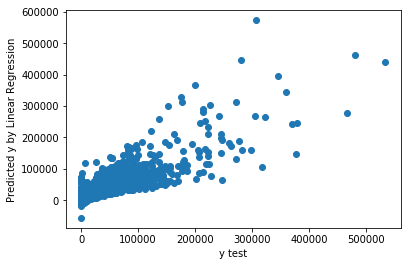

In [111]:
plt.scatter(y_test,lin_pred)
plt.xlabel('y test')
plt.ylabel('Predicted y by Linear Regression')

In [112]:
# Random Forest Regression

In [113]:
regressor_rf = RandomForestRegressor(n_estimators = 100,
                                      max_depth = 30, 
                                      max_features = 'sqrt',
                                      n_jobs = -1,
                                      oob_score = True) #max_depth = 35

regressor_rf.fit(X_train, y_train)  # fit the model on the train data
print("rf train score:",regressor_rf.score(X_train, y_train))
print("rf test score:", regressor_rf.score(X_test, y_test))
forest_pred = regressor_rf.predict(X_test) # predict the model on the test data

rf train score: 0.6767009535136572
rf test score: 0.598040980075065


In [114]:
# evaluation metrics
print("Mean Squared Error : ", mean_squared_error(y_test, forest_pred))
print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_test, forest_pred)))
print("R2_score : ", r2_score(y_test, forest_pred))

Mean Squared Error :  22862255.65508436
Root Mean Squared Error :  4781.449116646998
R2_score :  0.598040980075065


Text(0, 0.5, 'Predicted y by Random Forest Regression')

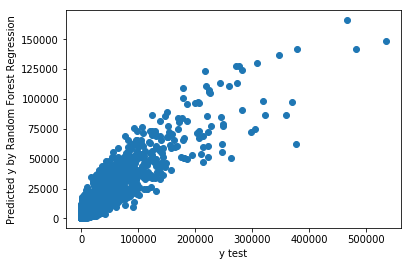

In [115]:
plt.scatter(y_test,forest_pred)
plt.xlabel('y test')
plt.ylabel('Predicted y by Random Forest Regression')